In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [4]:
df = pd.read_csv("./data/creditcard.csv")
df["Class"] = pd.Categorical(df["Class"])
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [6]:
df.dtypes

Time       float64
V1         float64
V2         float64
V3         float64
V4         float64
V5         float64
V6         float64
V7         float64
V8         float64
V9         float64
V10        float64
V11        float64
V12        float64
V13        float64
V14        float64
V15        float64
V16        float64
V17        float64
V18        float64
V19        float64
V20        float64
V21        float64
V22        float64
V23        float64
V24        float64
V25        float64
V26        float64
V27        float64
V28        float64
Amount     float64
Class     category
dtype: object

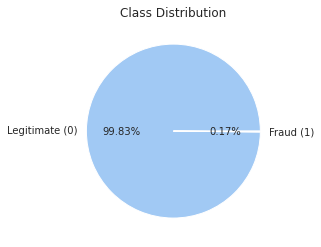

0    284315
1       492
Name: Class, dtype: int64


<Figure size 432x288 with 0 Axes>

In [7]:
counts = [df[df["Class"] == 0].shape[0], df[df["Class"] == 1].shape[0]]
labels = ["Legitimate (0)", "Fraud (1)"]

plt.pie(counts, labels=labels, colors = sns.color_palette('pastel')[:len(counts)], autopct="%.2f%%")
plt.title("Class Distribution")
plt.show()
plt.clf()

print(df["Class"].value_counts())

<AxesSubplot:title={'center':'Legitimate Cases'}, xlabel='Features', ylabel='Means'>

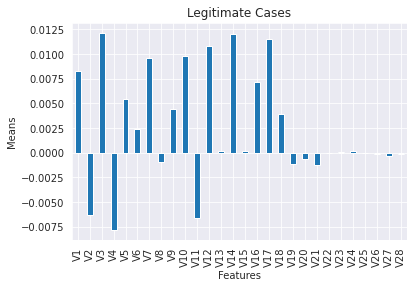

In [8]:
df[df["Class"] == 0].iloc[:, 1:-2].mean().plot(kind="bar", title="Legitimate Cases", xlabel="Features", ylabel="Means")

<AxesSubplot:title={'center':'Fradulent Cases'}, xlabel='Features', ylabel='Means'>

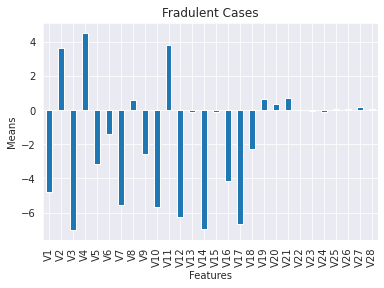

In [9]:
df[df["Class"] == 1].iloc[:, 1:-2].mean().plot(kind="bar", title="Fradulent Cases", xlabel="Features", ylabel="Means")

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df["Class"], test_size=0.3, stratify=df["Class"], random_state=42)

print(X_train.shape)
print(X_test.shape)

(199364, 30)
(85443, 30)


In [11]:
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



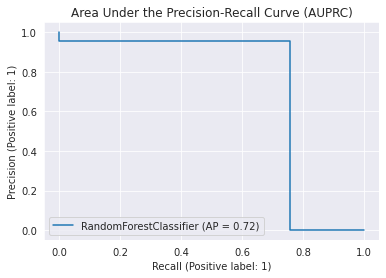

In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc = make_pipeline(StandardScaler(), RandomForestClassifier(n_jobs=-1, random_state=42))
rfc.fit(X_train.to_numpy(), y_train.to_numpy())
rfc_pred = rfc.predict(X_test.to_numpy())

print(classification_report(y_test, rfc_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, rfc_pred, name="RandomForestClassifier").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

[20:02:55] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.78      0.85       148

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



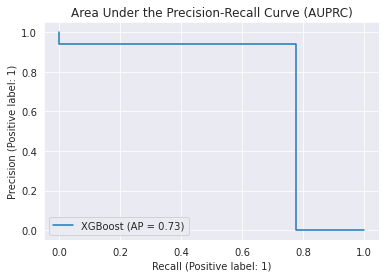

In [13]:
from xgboost import XGBClassifier

xgb = make_pipeline(StandardScaler(), XGBClassifier(random_state=42))
xgb.fit(X_train.to_numpy(), y_train.to_numpy())

xgb_pred = xgb.predict(X_test.to_numpy())

print(classification_report(y_test, xgb_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, xgb_pred, name="XGBoost").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

In [14]:
from sklearn.linear_model import SGDClassifier

from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import PolynomialCountSketch
from sklearn.kernel_approximation import RBFSampler

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.55      0.66       148

    accuracy                           1.00     85443
   macro avg       0.92      0.77      0.83     85443
weighted avg       1.00      1.00      1.00     85443



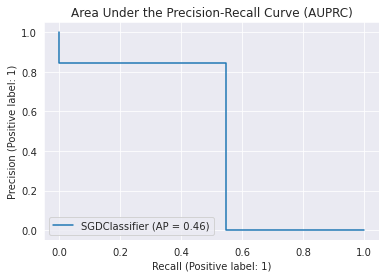

In [15]:
sgd = make_pipeline(StandardScaler(), SGDClassifier(random_state=42))
sgd.fit(X_train, y_train)

sgd_pred = sgd.predict(X_test)

print(classification_report(y_test, sgd_pred))

display = PrecisionRecallDisplay.from_predictions(y_test, sgd_pred, name="SGDClassifier").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.53      0.65       148

    accuracy                           1.00     85443
   macro avg       0.92      0.76      0.82     85443
weighted avg       1.00      1.00      1.00     85443



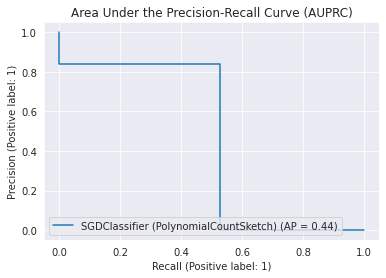

In [16]:
rbf_feature = PolynomialCountSketch(gamma=1.0, degree=2, n_components=100, random_state=42)
X_features = pd.DataFrame(rbf_feature.fit_transform(X_train))

sgd = make_pipeline(StandardScaler(), SGDClassifier(random_state=42))
sgd.fit(X_features, y_train)

sgd_pred = sgd.predict(pd.DataFrame(rbf_feature.fit_transform(X_test)))

print(classification_report(y_test, sgd_pred))

display = PrecisionRecallDisplay.from_predictions(y_test, sgd_pred, name="SGDClassifier (PolynomialCountSketch)").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")